# Linear Regression

<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Download the&nbsp;</span><a href="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/126/startups.csv" style="text-decoration:none;"><span style="font-size:10.5pt;font-family:Arial;color:#1155cc;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:underline;-webkit-text-decoration-skip:none;text-decoration-skip-ink:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">startups dataset</span></a><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">&nbsp;and save it to the same location as this script. Then run the code below to read this dataset.</span></p>
<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;padding:11pt 0pt 0pt 0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">This dataset captures key information about startups, including R&amp;D spend, Administration cost, Marketing spend, state and profit. We&rsquo;ll use this dataset in this course&rsquo;s exercise to build a regression model that we can use to predict the profit growth from marketing expenditure.</span></p>
<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;padding:11pt 0pt 0pt 0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">We&rsquo;ve already updated the code to reflect the changes that were made after the previous exercise.</span></p>





In [1]:
import pandas as pd

startups=pd.read_csv("Startups.csv", index_col = 0)
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
Startup ID,,,,,
1,165349.20,136897.80,471784.10,New York,192261.83
2,162597.70,151377.59,443898.53,California,191792.06
3,153441.51,101145.55,407934.54,Florida,191050.39
4,144372.41,118671.85,383199.62,New York,182901.99
5,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
response = startups["Profit"]
predictors = startups.iloc[:,:4]
predictors=pd.get_dummies(predictors,drop_first=True)
predictors.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
Startup ID,,,,,
1,165349.20,136897.80,471784.10,0,1
2,162597.70,151377.59,443898.53,0,0
3,153441.51,101145.55,407934.54,1,0
4,144372.41,118671.85,383199.62,0,1
5,142107.34,91391.77,366168.42,1,0


<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the .corr() method, create a correlation matrix on our entire data (response and predictors). This will enable us to see the relationship between each feature/column in the data.

In [3]:
#We'll start by specifying the startups variable
#This is because it contains the predictors and response variables
#It doesn't contain dummy variables, but this is okay as binary variables always have a linear relationship
#We then use the .corr() method to create the matrix
correlation_matrix = startups.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<hr style="height:2px;border-width:0;color:black;background-color:black">

Using the heatmap function from the seaborn library, convert the correlation matrix into a heatmap. This will make it easier to view the correlation matrix.

Ensure that annotations have been enabled. Ensure the vertical axis ticks range from -1 to 1.

<AxesSubplot:>

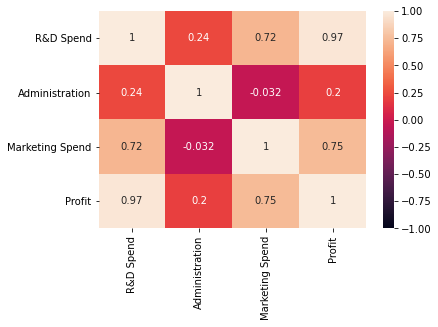

In [4]:
#We'll start by importing the seaborn library using the alias sns
import seaborn as sns

#We'll then call the heatmap function from the seaborn library
#For the first argument, we'll specify the correlation_matrix variable from the previous cell
#We'll then set annot=True to enable annotations
#We'll set vmin=-1 and vmax to equal 1 to ensure that the axis ticks range from -1 to 1
sns.heatmap(correlation_matrix,annot=True,vmin=-1,vmax=1)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Examine the heatmap above.

Check the relationships between the response variable and each predictor variable? Do any of these R scores fall within the range of -0.25 to 0.25? If so, remove that column from the predictors dataframe. This is because these columns do not have a strong enough relationship with the response to have enough predictive power for our model.

Check the relationships between each of the predictor variables? Do any of these R scores fall outside the range of -0.8 to 0.8? If so, remove one of those columns from the predictors dataframe. This is because these columns are too closely related, so it's likely they're actually measuring the same thing. Keeping them both in is akin to double counting that factor.

In [5]:
#We remove the Administration column because its R score with Profit is just 0.2
#This is below the 0.25 threshold
#This is regarded as being the minimum R score for a predictor variable to be useful to regression
predictors = predictors.drop('Administration', axis=1)
predictors.head()

#No two predictors have an R score outside the range of -0.8 to 0.8
#This means there's no multicollinearity, so we don't need to remove any other columns

,R&D Spend,Marketing Spend,State_Florida,State_New York
Startup ID,,,,
1,165349.20,471784.10,0,1
2,162597.70,443898.53,0,0
3,153441.51,407934.54,1,0
4,144372.41,383199.62,0,1
5,142107.34,366168.42,1,0


<hr style="height:2px;border-width:0;color:black;background-color:black">

Import the linear_model portion of the sklearn library.

Instantiate the LinearRegression() function by setting it as the value of a variable called linear_regression. This will set us up to use linear regression in Python.

In [6]:
#Imports the linear_model portion of the sklearn library, using the alias skl
import sklearn.linear_model as skl

#Instantiates the LinearRegression() function
#This means we set the value of a variable to equal the LinearRegression() function
#This is because the .fit(), .coef_, and .intercept_ methods can only be applied to a variable
linear_regression=skl.LinearRegression()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the .fit() method on the linear_regression variable we created in the cell above. In the arguments for the .fit() method, specify the predictor variables the response variable. This code will let us train the model using our data.

In [7]:
#First we specify the linear_regression variable that contains the LinearRegression() function
#Then we apply the .fit() method
#We'll specify the predictors variable and then the response variable
linear_regression.fit(predictors,response)

LinearRegression()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use .coef_ and .intercept_ to view the coefficients and intercept for our regression model. These are the values we can use to manually calculate a regression prediction, if we want to.

In [8]:
#We start by applying .coef_ to the linear_regression variable that contains the LinearRegression() function
#We then do the same with .intercept_
#We'll then wrap both in print functions so we can view the outputs of both
print(linear_regression.coef_)
print(linear_regression.intercept_)

[ 7.96742691e-01  2.97505939e-02  1.40786946e+02 -1.95234355e+01]
46958.94498371637


<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the .score() method to get the R-Squared of the regression model. This metric gives us a good indication of how good our model is.

In [9]:
#The .score method is used on the linear_regression variable
#For arguments, we need to specify the predictors and the response, in that order
r_squared=linear_regression.score(predictors, response)
r_squared

0.950453304509085

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the .predict() method to use our regression model to create predictions for profit.

In [10]:
#Uses the .predict() method on the linear_regression variable
#Takes just predictors as an argument
#It doesn't need response
#The output of this method is predictors for what response would be if we didn't already know
predictions = linear_regression.predict(predictors)
predictions

array([192716.0452252 , 189713.71887754, 181489.42830458, 173367.5002271 ,
       171216.44432683, 162806.71865517, 158012.4800244 , 160549.33819417,
       152251.47371715, 154298.49345059, 135115.90786232, 134598.64195384,
       129317.86038055, 127770.14103889, 150295.04340472, 145973.26903398,
       116979.77243539, 130763.57544254, 128974.23689736, 115793.68584176,
       116599.09593794, 118313.02119203, 115078.28489041, 109972.83231529,
       112505.85745725, 102584.54989972, 111105.52769009, 114898.05290112,
       103240.77681263, 102397.53863722,  99204.58924072,  98273.93017884,
        98850.55426385,  97699.64404089,  90219.93279216,  89715.0275025 ,
        75921.01554709,  87933.09778899,  68568.94627633,  82886.48909989,
        75009.52104682,  74216.31336716,  70197.80408633,  60350.6612502 ,
        65471.87197074,  47792.99053796,  56987.14672519,  46958.94498372,
        47371.29592367,  48302.8703492 ])

<hr style="height:2px;border-width:0;color:black;background-color:black">

Calculate the model's error (aka residuals) by subtracting the predicted profit from actual profit. By having data about the model's error, we can determine if there are any faults in the model.

In [11]:
#We can easily do this by subtracting the response_predictions variable from the response variable
error = response-predictions
error

Startup ID
1      -454.215225
2      2078.341122
3      9560.961695
4      9534.489773
5     -5028.504327
6     -5815.598655
7     -1889.970024
8     -4796.738194
9       -39.703717
10    -4538.533451
11    11006.042138
12     9660.758046
13    12267.659619
14     6537.208961
15   -17692.393405
16   -16056.229034
17    10013.157565
18    -5393.205443
19    -4707.336897
20     6983.174158
21     1874.934062
22    -7000.001192
23    -4726.034890
24    -1238.842315
25    -3953.817457
26     4819.790100
27    -5371.987690
28    -9889.742901
29       41.603187
30    -1392.898637
31      733.000759
32     -790.370179
33    -1422.714264
34     -920.724041
35     6492.867208
36     6764.482498
37    14787.174453
38     2016.042211
39    12660.113724
40    -1880.729100
41     3230.388953
42     3582.516633
43     1300.685914
44     9408.318750
45     -271.541971
46    17133.089462
47    -7496.396725
48    -4399.214984
49   -11697.885924
50   -33621.470349
Name: Profit, dtype: float64

<hr style="height:2px;border-width:0;color:black;background-color:black">

Use a histogram on the errors (aka residuals) to determine if they're normally distributed. If not, we'll have to reject this model.

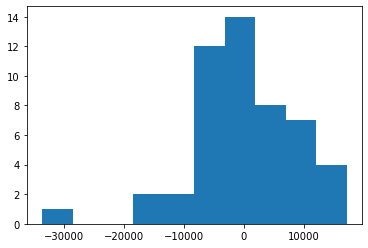

In [12]:
#We start by importing the pyplot portion of the MatPlotLib library using the alias plt
import matplotlib.pyplot as plt

#We then use the hist function on the error variable
plt.hist(error)
plt.show()

#We can see that although not perfect, the error (aka residuals) is normally distributed
#This means that our model doesn't need to be rejected for not meeting this requirement

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a scatter plot comparing predictions to errors (aka residuals). Use this to determine if the residuals are homoscedastic  or heteroscedastic. If the residuals are well distributed across the chart, it means that the data is heteroscedastic that's good because it means that the model is equally accurate no matter what value it predicts.

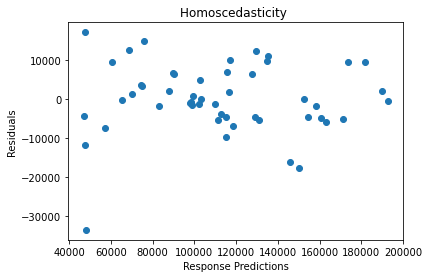

In [13]:
plt.scatter(predictions,error)
plt.title("Homoscedasticity ")
plt.xlabel("Response Predictions")
plt.ylabel("Residuals")
plt.show()